# User Variables

In [1]:
# Data
MIN_OBSERVATIONS = 500
NB_TOP_RULES = 3


PAKDD2023_OUTPUT_FILE_PATH_STAMP = "output_rules_stamp.txt"
PAKDD2023_OUTPUT_FILE_PATH_NARM = "output_rules_narm.txt"

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 2)

In [3]:
def extract_coverage(file_path):
    rules_str = ""
    with open(file_path, 'r') as file:
        rules_str = file.read()

    #print(rules_str[:500])

    data = []

    for part in rules_str.split("Best rules of "):
        #print(part)
        for idx, line in enumerate(part.split("\n")):
            if len(line) != 0 and line[0] == ">":
                #print(line)
                tokens = line.split(" ")
                coverage = float(tokens[1][:-2])
                observations = tokens[2]
                observations = int(observations[observations.find("/")+1:-1])
                #print(coverage, observations)
                #print()
                
                if observations >= MIN_OBSERVATIONS:
                    data.append(coverage)
                    if idx >= NB_TOP_RULES:
                        break

    return data

In [4]:
data = [ ["STAMP", i] for i in extract_coverage(PAKDD2023_OUTPUT_FILE_PATH_STAMP)] + [ ["NARM", i] for i in extract_coverage(PAKDD2023_OUTPUT_FILE_PATH_NARM)]
df = pd.DataFrame(data, columns=["SRS model", "coverage"])
df

,SRS model,coverage
0,STAMP,23.8
1,STAMP,23.1
2,STAMP,7.0
3,STAMP,16.2
4,STAMP,14.0
...,...,...
637,NARM,8.4
638,NARM,2.5
639,NARM,48.1
640,NARM,12.0


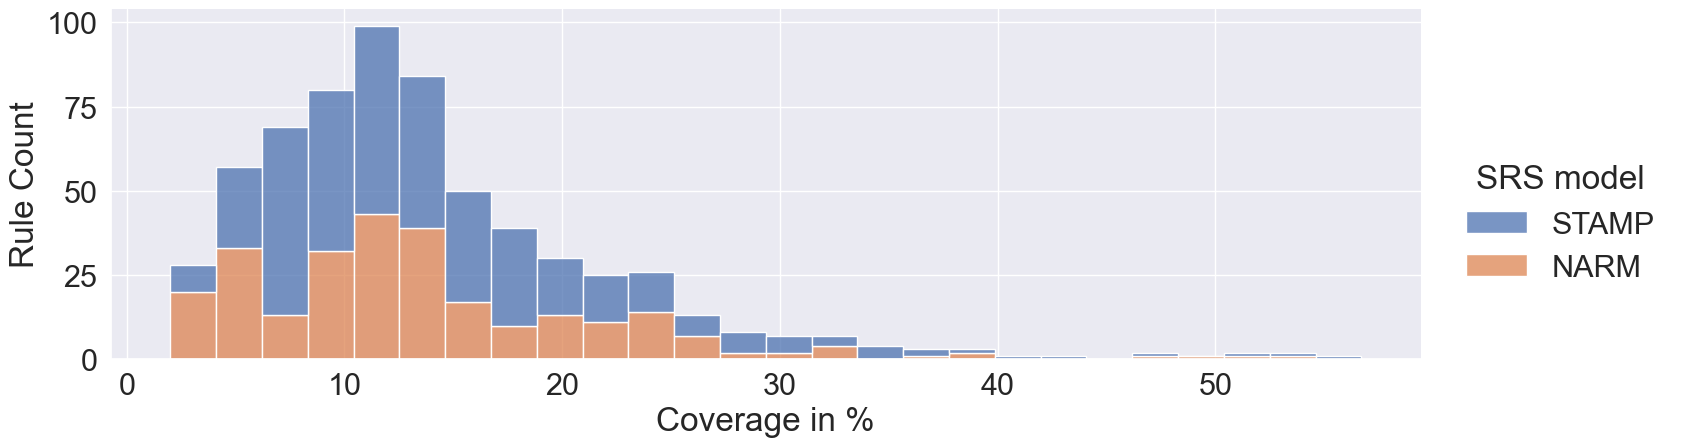

In [5]:
fig = sns.displot(data=df, x="coverage", hue="SRS model", multiple="stack", height=5, aspect=3)
fig.set_axis_labels('Coverage in %', 'Rule Count')
plt.savefig('coverage_count.pdf')
plt.show()

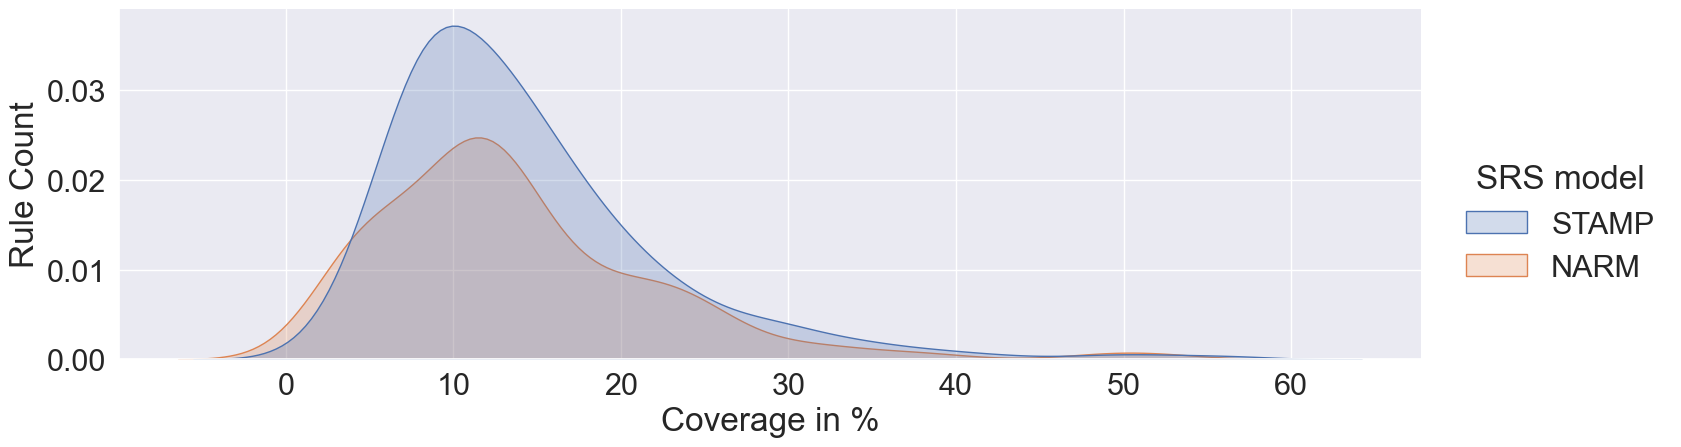

In [6]:
fig = sns.displot(df, x="coverage", hue="SRS model", kind="kde", fill=True, height=5, aspect=3)
fig.set_axis_labels('Coverage in %', 'Rule Count')
plt.savefig('coverage_density.pdf')
plt.show()

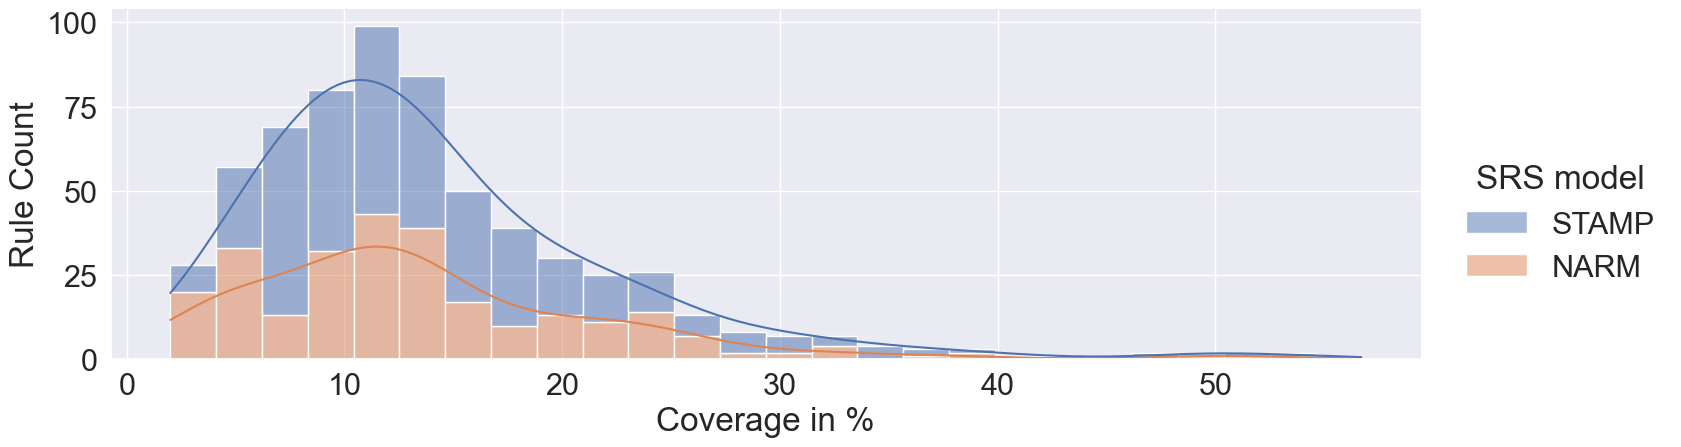

In [11]:
fig = sns.displot(df, x="coverage", hue="SRS model", fill=True, kde=True, multiple="stack", height=5, aspect=3)
fig.set_axis_labels('Coverage in %', 'Rule Count')

plt.savefig('coverage_combined.pdf')
plt.show()